In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data

Paper by: Hadley Wickham

https://vita.had.co.nz/papers/tidy-data.pdf

## Data cleaning:
- tidy data != clean data
    - outlier checking
    - date parsing
    - missing value imputation etc.
    - data tidying: structuring datasets to facilitate analysis.

## Data semantics: tidy data
- **Value**: every value belongs to a variable and an observation.
- **Variable**: a variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units.
- **Observation**: an observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes.


## CSV data for lesson and exercises:
https://classroom.google.com/u/0/w/MjI5NDAwNDI2NTg5/tc/MjI5NDAwNDI2NjAy

In [2]:
# lets look at this data:
treatments = pd.read_csv('untidy-data/treatment.csv')
treatments

,Unnamed: 0,treatmenta,treatmentb,treatmentc
0,John Smith,NaN,2,0
1,Jane Doe,16.0,11,3
2,Mary Johnson,3.0,1,4


In [3]:
#rename columns
treatments.columns = ['name', 'a', 'b', 'c'] # changed the colum names
treatments

,name,a,b,c
0,John Smith,NaN,2,0
1,Jane Doe,16.0,11,3
2,Mary Johnson,3.0,1,4


In [4]:
# restructure data using 'melt'
treatments = treatments.melt(id_vars=['name'], var_name='treatment', value_name='response')

In [5]:
treatments

,name,treatment,response
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0
6,John Smith,c,0.0
7,Jane Doe,c,3.0
8,Mary Johnson,c,4.0


## Tidy data :
- Check that your data has:
    - Each variable forms a column.
    - Each observation forms a row.
    - Each cell has a single value.
        - each cell cannot have multiple values stored in a single cell
    - data is tabular, i.e. made up of rows and columns

#### Examples of tidy-data

In [6]:
# ALL the py data sets are tidy data

tips = data('tips')
tips.head()
# this is tidy data

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
mpg = data('mpg')
mpg.head()
# this is tidy data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### General Ideas
- If the units are the same, maybe they should be in the same column.
- If one column has measurements of different units, it should be spread out
- Should you be able to groupby some of the columns? combine them
    - you have a single variable spread out over multiple columns that need to be in one
- Can I pass this data to seaborn?
- Can we ask interesting questions and answer them with a groupby? i.e. generally we don't want to be taking row or column averages.
    - if you ask what is the avg response for john smith you would have to avg across
        - but if you ask for the response of treatmentt you have to avg down the column
            - but if you are woking on a tidy data you can just do treatments.groupby you can get the 

## How to deal with 'messy' data
#### Reshaping data:
- Wide data (wide format) --> Long data format (Melt)
- Long data (long format) --> Wide Data format (pivot)


**1. Messy data: Column headers are values, not variable names**

In [8]:
df = pd.read_csv('untidy-data/pew.csv')

In [9]:
# look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [10]:
# look at the head
df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [11]:
# melt the data.
# make a column called income where all the values are part of the column
# going from wide to long

    # pd.melt OR df.melt
pd.melt(df, id_vars = 'religion', var_name = 'income', value_name = 'count') 
            # id_vars is the columnyou want to keep not melt
            # var_name renames the column from variable to whatever
            # value_name changes the col name from value to whatever

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


#### pd.melt arguments
- **id_vars** = columns you want to keep (not melt)
- **var_name** = name of new column you created by melting columns
- **value_name** = column name for values


#### Another example: one variable stored across multiple columns¶

In [12]:
billboard = pd.read_csv('untidy-data/billboard.csv', encoding= 'unicode_escape')

In [13]:
billboard.shape

(317, 83)

In [14]:
billboard.head()
# so many weeks
# there is no need for so many weeks

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/00,11/18/00,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/99,1/29/00,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,8/12/00,9/16/00,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/00,10/14/00,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# go from messy to tidy
# all those weeks can just be one column
billboard_long = pd.melt(billboard, 
                         id_vars = ['year', 'artist', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
                       var_name = 'week',
                       value_name = 'rating')

billboard_long.head()

,year,artist,track,time,genre,date.entered,date.peaked,week,rating
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/00,11/18/00,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/99,1/29/00,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,8/12/00,9/16/00,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/00,10/14/00,x1st.week,57.0


In [16]:
#What is the average rating for each song?
    # if we had used the untidy date we would have ot do this row by row
        # but since we tidied it up first:

billboard_long.groupby('track').rating.mean()
# SO EASY!
# Shows you the average for each track just like that!

track
(Hot S**t) Country Grammar      30.882353
3 Little Words                  94.444444
911                             60.000000
A Country Boy Can Survive       86.666667
A Little Gasoline               89.833333
                                  ...    
You Won't Be Lonely Now         88.692308
You'll Always Be Loved By Me    76.842105
You're A God                    37.000000
Your Everything                 72.000000
www.memory                      63.400000
Name: rating, Length: 316, dtype: float64

**2. Messy data: Multiple variables are stored in one column.**

In [35]:
df = pd.DataFrame({
    'name': ['Sally', 'Jane', 'Billy', 'Suzy'],
    'pet': ['dog: max', 'dog: buddy', 'cat: grizabella', 'hamster: fred']
})
df
# we have multiple values in a single column
# we need to split this column into 2
    # pet type and pet name

,name,pet
0,Sally,dog: max
1,Jane,dog: buddy
2,Billy,cat: grizabella
3,Suzy,hamster: fred


In [36]:
df.pet.str.split(": ", expand = True) 
    # str.split seperated starting at the colon
    # the exands turns the split words into 2 seperate columns

,0,1
0,dog,max
1,dog,buddy
2,cat,grizabella
3,hamster,fred


In [37]:
df[['pet_species', 'pet_name']] = df.pet.str.split(": ", expand = True)
# by doing the df[['   ', '   '']] you are naming the columns you will be splitting
df

,name,pet,pet_species,pet_name
0,Sally,dog: max,dog,max
1,Jane,dog: buddy,dog,buddy
2,Billy,cat: grizabella,cat,grizabella
3,Suzy,hamster: fred,hamster,fred


**Messy data: Variables are stored in both rows and columns**

In [38]:
weather = pd.read_csv('untidy-data/weather.csv')
weather.head()
# so many days all those days can be one column
# element only contains t max and t min that need to be 2 columns

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
weather_melt = weather.melt(id_vars = ['id', 'year', 'month', 'element'],
                           var_name = 'day', value_name = 'temp')
weather_melt
# this compined all the columns except the id_vars into one column named day 
# and added a new colum called temp

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [40]:
# time to fix the tmax and tmin
weather_tidy = weather_melt.pivot_table(index = ['id', 'year', 'month', 'day'],
                                       columns = 'element',
                                       values = 'temp')
    # index are the columns you want to keep and not pivot
    # columns are the columns you want to pivot

weather_tidy.head()

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4

In [41]:
# we now have a funky multi index data frame
# you can fix this by:

weather_tidy.reset_index(inplace = True)
weather_tidy
# SO MUCH BETTER!

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2



#### pd.pivot_table arguments
- **Index** = columns you want to keep (not pivot)
- **columns** = column you want to pivot
- **value_name** = values we want to populate in the new columns
- **aggfunct** = how you want tp aggregate the duplicate rows

**Bit more complex example**

In [42]:
sales = pd.read_csv('untidy-data/sales.csv')
sales

,Product,2016 Sales,2016 PPU,2017 Sales,2017 PPU,2018 Sales,2018 PPU
0,A,673,5,231,7,173,9
1,B,259,3,748,5,186,8
2,C,644,3,863,5,632,5
3,D,508,9,356,11,347,14


In [43]:
sales_melt = sales.melt(id_vars = 'Product')
sales_melt
# now those columns are one
# but we still need to split the column with multiple variables

,Product,variable,value
0,A,2016 Sales,673
1,B,2016 Sales,259
2,C,2016 Sales,644
3,D,2016 Sales,508
4,A,2016 PPU,5
5,B,2016 PPU,3
6,C,2016 PPU,3
7,D,2016 PPU,9
8,A,2017 Sales,231
9,B,2017 Sales,748


In [44]:
sales_melt[['year', 'measure']] = sales_melt.variable.str.split(' ', expand = True)
sales_melt

,Product,variable,value,year,measure
0,A,2016 Sales,673,2016,Sales
1,B,2016 Sales,259,2016,Sales
2,C,2016 Sales,644,2016,Sales
3,D,2016 Sales,508,2016,Sales
4,A,2016 PPU,5,2016,PPU
5,B,2016 PPU,3,2016,PPU
6,C,2016 PPU,3,2016,PPU
7,D,2016 PPU,9,2016,PPU
8,A,2017 Sales,231,2017,Sales
9,B,2017 Sales,748,2017,Sales


In [45]:
# now drop the other column holding 2 variables
sales_melt.drop(columns = 'variable', inplace = True)
sales_melt

,Product,value,year,measure
0,A,673,2016,Sales
1,B,259,2016,Sales
2,C,644,2016,Sales
3,D,508,2016,Sales
4,A,5,2016,PPU
5,B,3,2016,PPU
6,C,3,2016,PPU
7,D,9,2016,PPU
8,A,231,2017,Sales
9,B,748,2017,Sales


In [31]:
# only proble left is to 
s_tidy = sales_melt.pivot_table(index = ['Product', 'year'],
                               columns = 'measure',
                               values = 'value')
s_tidy

measure       PPU  Sales
Product year            
A       2016    5    673
        2017    7    231
        2018    9    173
B       2016    3    259
        2017    5    748
        2018    8    186
C       2016    3    644
        2017    5    863
        2018    5    632
D       2016    9    508
        2017   11    356
        2018   14    347

In [32]:
s_tidy.reset_index(inplace = True)
s_tidy

measure,Product,year,PPU,Sales
0,A,2016,5,673
1,A,2017,7,231
2,A,2018,9,173
3,B,2016,3,259
4,B,2017,5,748
5,B,2018,8,186
6,C,2016,3,644
7,C,2017,5,863
8,C,2018,5,632
9,D,2016,9,508


## Key components of tidy data:

data is tabular, i.e. made up of rows and columns
there is one value per cell
each variable is a column
each observation is a row

Untidy Data

Does not follow the rules above. We'll examine 3 cases of untidy data:

a variable is spread across multiple columns, requiring a melt
one column contains multiple variables, requiring a pivot, or spread
multiple variables are combined together

These formats are common to see "in the wild", and need to be re-shaped for further analysis.

As we go along, we'll look at two major kinds of transformations:

a melt takes the data from wide to long
a spread, or pivot takes the data from long to wide

In [29]:
import pandas as pd

One Variable in Multiple Columns

In [30]:
treatments = pd.read_csv('data/treatments.csv')
treatments

FileNotFoundError: [Errno 2] No such file or directory: 'data/treatments.csv'

Type type of treatment, that is, either "a", "b", or "c", is a variable, and as such, should be its own column. The numbers in the table represent each subject's response to each treatment, and should be in their own column as well.

Let's start by renaming the columns:

In [ ]:
treatments.columns = ['name', 'a', 'b', 'c']
treatments

Now we can apply a melt to combine the last 3 columns in our data frame.

A melt will combine multiple columns into two columns. There are 3 key parameters when melting:

id_vars: Which vars should not be melted. If omitted, all the columns in the data frame will be melted together.
var_name: The name of the column that will hold the names of the of the columns that will be combined.
value_name: The name of the column that will hold the resulting values.
In our example above, the id_vars should be name, as we don't want to combine this column with any others. However, we will be combining the a, b, and c columns into one. var_name will be treatment as "treatment" describes the contents of the columns we are combining, and the value_name will be response, as that is what the numerical values are.

In [ ]:
treatments.melt(id_vars=['name'], var_name='treatment', value_name='response')

One Column with Multiple Variables

Here is some (fictional) data on codeup students:

In [ ]:
students = pd.read_csv('data/students.csv')
students.head(9)

You can think of this kind of untidy data as data that has (incorrectly) had a melt applied to it. In our example, we want A, B, C, and D to be seperate columns.

Notice that the var column contains several different variable names, and the val column contains the values corresponding to each. Here we would be better off with seperate columns for n_late_from_break, coffee_consumption, and classroom_temp were seperate columns, as they are seperate variables.

Using pandas, we can make this happen in a couple ways:

pivot
setting the index and .unstacking
We'll demonstrate both:

In [ ]:
students.pivot(index='date', columns='var')

In [ ]:
students.set_index(['date', 'var']).unstack(level=1)

When doing this manipulation, pandas creates a MultiIndex for our rows and columns. In our case this isn't helping us out at all, so we can get rid of it to make working with the resulting data frame easier.

In [ ]:
tidy_students = students.set_index(['date', 'var']).unstack(level=1)
tidy_students.columns = tidy_students.columns.droplevel()
tidy_students.columns.name = ''

tidy_students

A More Complex Example
We'll now explore a more complex example that requires more tidying.

In [ ]:
sales = pd.read_csv('./data/sales.csv')
sales

Here all of the columns except for Product contain a combination of a year and a variable. We want to tidy up the data so that it looks like this:!




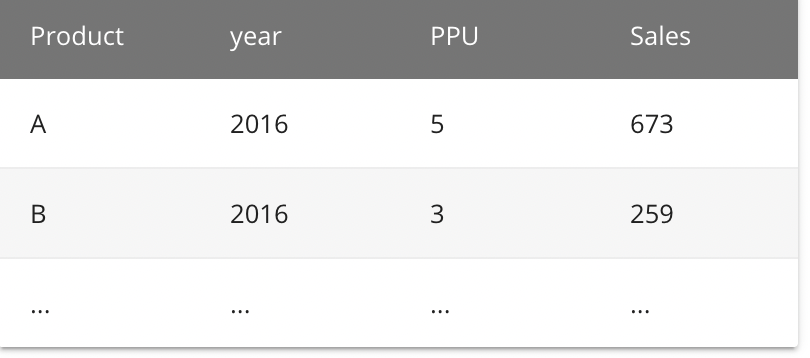

First we'll need to melt so that we combine the columns together, then we'll split up the one column into two, and reshape the data.

In [ ]:
sales_melt = sales.melt(id_vars='Product', var_name='year_and_measure')
sales_melt.head()

We'll need to split up the year_and_measure column into two. We can do this with the Series.str.split method, which will give us back a data frame, which we can then concatenate onto our original data, then remove the old column.

In [ ]:
year_and_measure_df = sales_melt.year_and_measure.str.split(' ', expand=True)
year_and_measure_df.columns = ['year', 'measure']
year_and_measure_df.head()

In [ ]:
sales2 = pd.concat([sales_melt, year_and_measure_df], axis=1).drop(columns='year_and_measure')
sales2.head()

In [ ]:
sales_tidy = sales2.pivot_table(index=['Product', 'year'], columns='measure', values='value')
sales_tidy.head()

All that's left is a little cleanup of the indexes:

In [ ]:
sales_tidy.columns.name = ''
sales_tidy.reset_index(inplace=True)
sales_tidy